## Telecom Churn Case Study by Sachin Katiyar and Asawari Kadam

In [1]:
#Importing required libraries and setting max row and max column limit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the given telecom_churn_data.csv file and storing it in df dataframe. Also printing five rows for the same.
df_main=pd.read_csv('telecom_churn_data.csv')
df_main.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
#Size of dataframe
df_main.shape

(99999, 226)

In [4]:
#Columns in dataframe
df_main.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [5]:
df=df_main

In [6]:
#Printing little info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
#Describing the dataframe to get and idea of spread of data in each column
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [8]:
#Finding out columns having ony one unique value and printing the same
cols_having_one_unique_value=df.loc[:,df.apply(pd.Series.nunique)==1].columns
print(cols_having_one_unique_value)

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')


In [9]:
#Dropping the above columns from dataframe as they will not add any value during classification
df=df.drop(cols_having_one_unique_value,axis=1)

In [10]:
#Dropping mobile number column as it is of no use in classification
df=df.drop(['mobile_number'],axis=1)

In [11]:
#Renaming columns from month name to month no to bring every column name on same standard which will be easy for analysis.
df=df.rename(columns={"jun_vbc_3g": "vbc_3g_6", "jul_vbc_3g": "vbc_3g_7","aug_vbc_3g": "vbc_3g_8","sep_vbc_3g": "vbc_3g_9"})

In [12]:
#Filtering High value customers as per condition of 70th Percentile and printing the shape of new dataframe - telecom_df
df['total_rech_good_phase']= (df['total_rech_amt_6']+ df['total_rech_amt_7'])/2
telecom_df=df[df['total_rech_good_phase']>df['total_rech_good_phase'].quantile(0.70)]
telecom_df.shape

(29979, 210)

In [13]:
#Printing percentage of null values for each column
telecom_df.isna().mean()*100

arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  1.054071
onnet_mou_7                  1.010707
onnet_mou_8                  3.128857
onnet_mou_9                  5.680643
offnet_mou_6                 1.054071
offnet_mou_7                 1.010707
offnet_mou_8                 3.128857
offnet_mou_9                 5.680643
roam_ic_mou_6                1.054071
roam_ic_mou_7                1.010707
roam_ic_mou_8                3.128857
roam_ic_mou_9                5.680643
roam_og_mou_6                1.054071
roam_og_mou_7                1.010707
roam_og_mou_8                3.128857
roam_og_mou_9                5.680643
loc_og_t2t_mou_6             1.054071
loc_og_t2t_mou_7             1.010707
loc_og_t2t_mou_8             3.128857
loc_og_t2t_mou_9             5.680643
loc_og_t2m_mou_6             1.054071
loc_og_t2m_mou_7             1.010707
loc_og_t2m_m

In [14]:
#Cell where data is not present means customer has not participated into that activity therefore filling null values with zero 
#will be a good idea. Filling with median or mode will disturb our dataset as this may the case where median is giving some value
#other than non zero and we are filling null values with that inspite user has not used that facility.
telecom_df=telecom_df.fillna(0)

In [15]:
#Feature engineering
#Printing object type columns and Since all object type columns are datetype, converting the same into date of the month
obj_type_col=telecom_df.select_dtypes(include='object').columns
print(obj_type_col)
for col in obj_type_col:
    telecom_df[col]=pd.to_datetime(telecom_df[col])
    telecom_df[col] = telecom_df[col].dt.day

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')


In [16]:
#Since as per problem mentioned, there are three phases - good, action and churn phase. Month 6 and 7 collectively represents
# good phase. Therefore taking average of same type columns in these two months will give us a good phase data.
#Printing all the columns name having data for month no 6 and 7
print(telecom_df.columns[telecom_df.columns.str.endswith('_6')])
print(telecom_df.columns[telecom_df.columns.str.endswith('_7')])
print("Total columns ending with _6 are: ",len(telecom_df.columns[telecom_df.columns.str.endswith('_6')]))
print("Total columns ending with _7 are: ",len(telecom_df.columns[telecom_df.columns.str.endswith('_7')]))

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6',
       'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6',
       'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6',
       'date_of_last_rech_6', 'last_day_rch_amt_6', 'date_of_last_rech_data_6',
       'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6',
       'count_rech_3g_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6',
       'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'monthly_2g_6',
       'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6

In [17]:
# printing actual column names referring by month 6 and 7 by removing month no from it
total_col_6_7=list(telecom_df.columns[telecom_df.columns.str.endswith('_6')].str[:-2])+list(telecom_df.columns[telecom_df.columns.str.endswith('_7')].str[:-2])
total_col_6_7=list(set(total_col_6_7))
print(total_col_6_7)

['sachet_2g', 'loc_og_mou', 'og_others', 'loc_ic_t2f_mou', 'date_of_last_rech', 'loc_ic_t2t_mou', 'total_rech_data', 'av_rech_amt_data', 'total_rech_num', 'loc_og_t2m_mou', 'spl_og_mou', 'arpu', 'roam_og_mou', 'std_og_t2m_mou', 'total_rech_amt', 'vbc_3g', 'vol_2g_mb', 'sachet_3g', 'ic_others', 'fb_user', 'monthly_2g', 'std_og_t2f_mou', 'isd_og_mou', 'std_ic_t2t_mou', 'offnet_mou', 'max_rech_data', 'count_rech_2g', 'roam_ic_mou', 'loc_og_t2c_mou', 'std_og_mou', 'vol_3g_mb', 'monthly_3g', 'loc_og_t2f_mou', 'loc_og_t2t_mou', 'loc_ic_t2m_mou', 'spl_ic_mou', 'isd_ic_mou', 'std_ic_t2m_mou', 'date_of_last_rech_data', 'std_og_t2t_mou', 'std_ic_mou', 'total_og_mou', 'max_rech_amt', 'onnet_mou', 'count_rech_3g', 'arpu_2g', 'std_ic_t2f_mou', 'total_ic_mou', 'loc_ic_mou', 'last_day_rch_amt', 'arpu_3g', 'night_pck_user']


In [18]:
#Creating new columns with average of 6 and 7 columns of same type and dropping the previous columns from dataframe
for col in total_col_6_7:
    telecom_df[col+"_avg67"]=(telecom_df[col+"_6"]+telecom_df[col+"_7"])/2
    telecom_df=telecom_df.drop(col+"_6",axis=1)
    telecom_df=telecom_df.drop(col+"_7",axis=1)

In [19]:
#Printing the updated shape of dataframe
telecom_df.shape

(29979, 158)

In [20]:
#Creating target column by checking sum of total_ic_mou_9, total_og_mou_9, vol_2g_mb_9 and vol_3g_mb_9 is zero or not.
# If zero then target column will have value as one else zero
telecom_df['Target_Column']=(telecom_df['total_ic_mou_9']+telecom_df['total_og_mou_9']+telecom_df['vol_2g_mb_9']+telecom_df['vol_3g_mb_9'])
telecom_df['Target_Column']=np.where(telecom_df['Target_Column'].astype(bool).astype(int)==0,1,0)

In [21]:
#Dropping all columns related to ninth month
col=pd.Series(telecom_df.columns)
telecom_df=telecom_df.drop(col.loc[col.str.endswith('_9')],axis=1)

In [22]:
#Updated shape of dataframe
telecom_df.shape

(29979, 107)

In [23]:
telecom_df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rch_amt_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,vbc_3g_8,total_rech_good_phase,sachet_2g_avg67,loc_og_mou_avg67,og_others_avg67,loc_ic_t2f_mou_avg67,date_of_last_rech_avg67,loc_ic_t2t_mou_avg67,total_rech_data_avg67,av_rech_amt_data_avg67,total_rech_num_avg67,loc_og_t2m_mou_avg67,spl_og_mou_avg67,arpu_avg67,roam_og_mou_avg67,std_og_t2m_mou_avg67,total_rech_amt_avg67,vbc_3g_avg67,vol_2g_mb_avg67,sachet_3g_avg67,ic_others_avg67,fb_user_avg67,monthly_2g_avg67,std_og_t2f_mou_avg67,isd_og_mou_avg67,std_ic_t2t_mou_avg67,offnet_mou_avg67,max_rech_data_avg67,count_rech_2g_avg67,roam_ic_mou_avg67,loc_og_t2c_mou_avg67,std_og_mou_avg67,vol_3g_mb_avg67,monthly_3g_avg67,loc_og_t2f_mou_avg67,loc_og_t2t_mou_avg67,loc_ic_t2m_mou_avg67,spl_ic_mou_avg67,isd_ic_mou_avg67,std_ic_t2m_mou_avg67,date_of_last_rech_data_avg67,std_og_t2t_mou_avg67,std_ic_mou_avg67,total_og_mou_avg67,max_rech_amt_avg67,onnet_mou_avg67,count_rech_3g_avg67,arpu_2g_avg67,std_ic_t2f_mou_avg67,total_ic_mou_avg67,loc_ic_mou_avg67,last_day_rch_amt_avg67,arpu_3g_avg67,night_pck_user_avg67,Target_Column
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,26,779,1,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0,0,0,0,0.0,802,57.74,1185.0,0.0,478.035,0.000,126.810,26.0,45.200,0.0,0.0,5.0,378.005,2.25,1209.5150,18.165,40.825,1185.0,19.060,0.0,0.0,15.465,0.0,0.0,13.37,0.09,24.360,510.295,0.0,0.0,24.860,0.0,68.000,0.000,0.0,58.635,41.385,219.525,0.105,8.295,109.215,1.0,13.795,176.810,548.385,1185.0,56.260,0.0,0.0,43.215,592.250,391.555,0.0,0.0,0.0,1
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,30,10,23,3.0,23.0,3.0,0.0,69.0,0.03,11.94,19.83,0.0,0.0,0,3,0,0,1.0,315,21.03,519.0,0.5,333.135,0.000,0.000,28.0,16.840,1.0,88.5,20.0,75.770,0.00,435.4720,0.000,11.865,519.0,516.405,178.0,0.0,0.000,0.5,0.5,0.00,0.00,0.290,87.645,77.0,1.0,0.000,0.0,136.870,375.475,0.0,0.000,257.360,35.780,0.000,0.000,13.255,16.0,124.995,13.545,470.010,122.0,382.360,0.0,0.0,0.000,66.175,52.630,25.0,0.0,0.0,0
13,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,30,0,30,3.0,23.0,3.0,0.0,69.0,0.02,0.00,0.00,0.2,0.0,0,3,0,0,1.0,2607,0.00,380.0,0.0,129.395,0.000,2.405,21.0,37.730,0.0,0.0,5.0,99.205,0.00,349.2585,21.620,154.150,380.0,0.000,0.0,0.0,49.860,0.0,0.0,0.00,0.00,76.985,266.295,0.0,0.0,83.885,0.0,420.355,0.000,0.0,2.270,27.910,80.705,0.225,153.695,168.960,1.0,266.195,245.950,549.750,110.0,305.075,0.0,0.0,0.000,570.595,120.845,80.0,0.0,0.0,0
16,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2,160,130,14,130,1,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0,0,0,0,0.0,511,0.00,459.0,0.0,265.775,0.000,8.695,30.5,56.385,0.0,0.0,8.0,209.640,1.63,365.4220,8.870,43.750,459.0,12.170,0.0,0.0,0.000,0.0,0.0,0.00,0.00,73.715,263.015,0.0,0.0,1.415,0.0,48.990,0.000,0.0,2.240,53.885,1

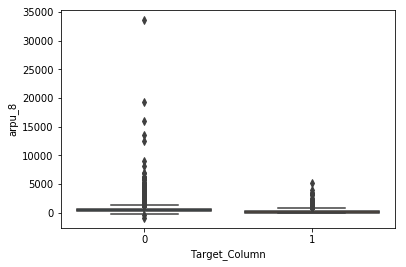

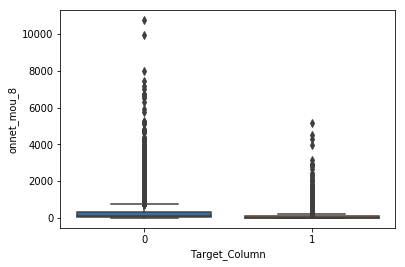

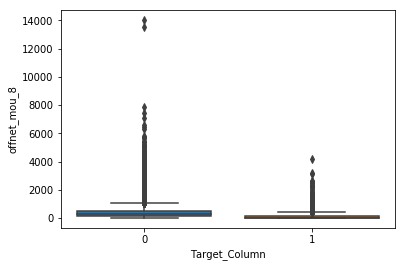

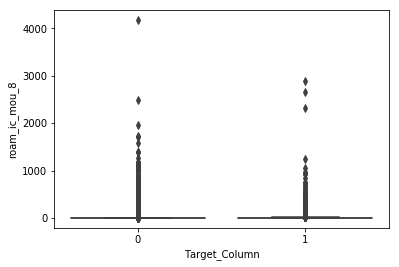

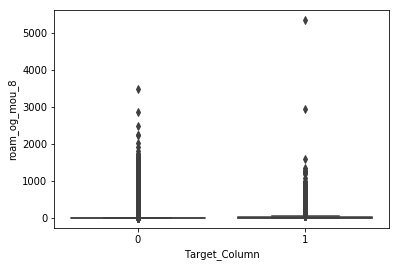

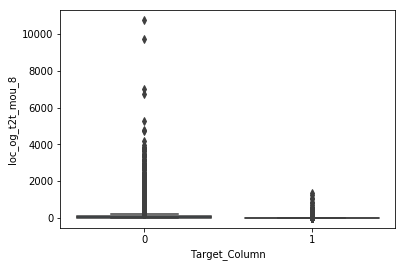

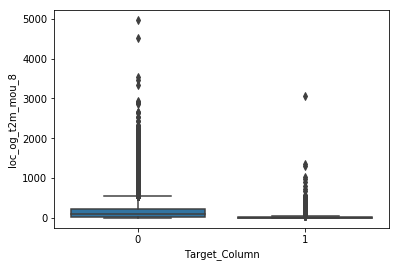

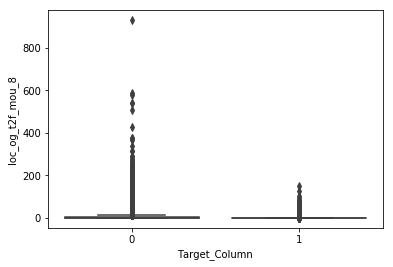

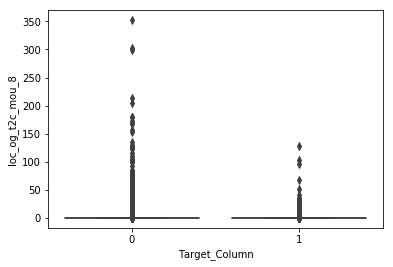

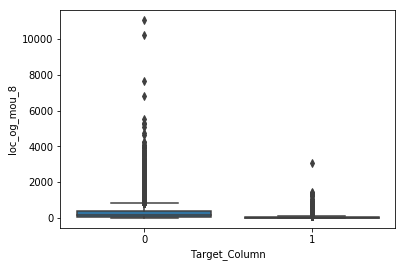

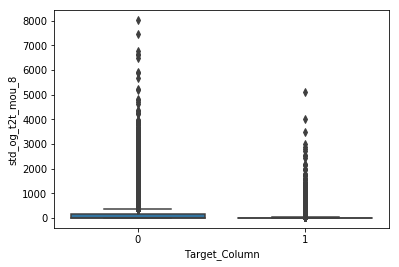

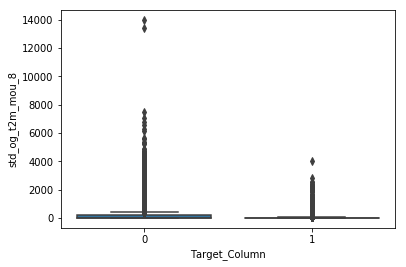

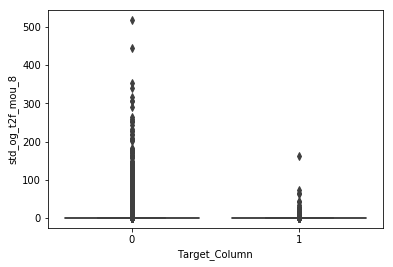

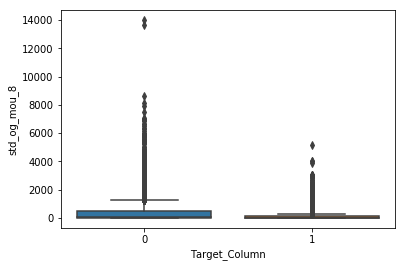

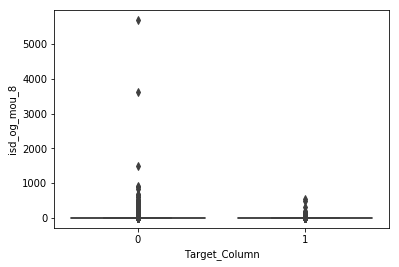

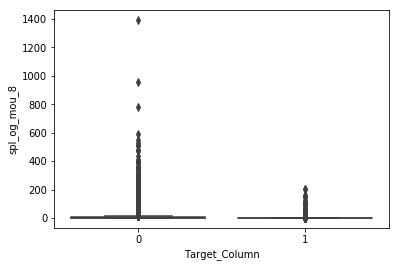

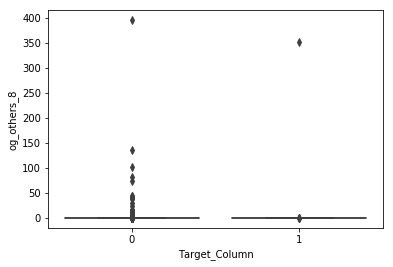

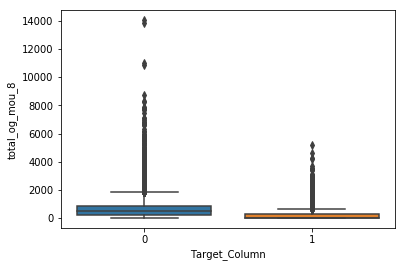

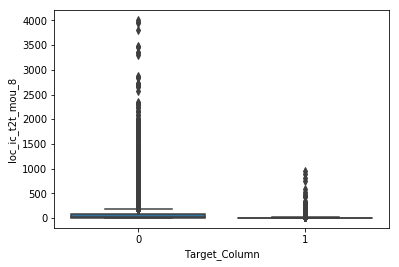

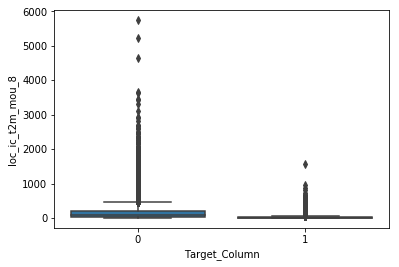

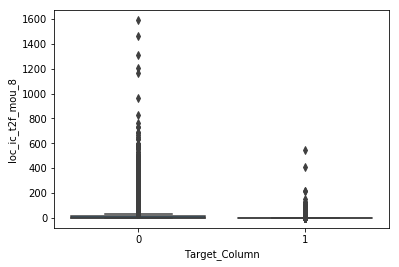

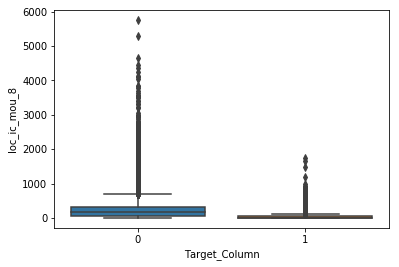

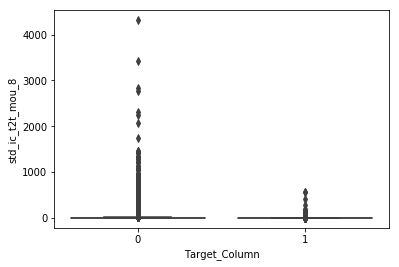

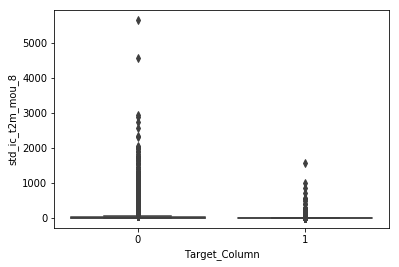

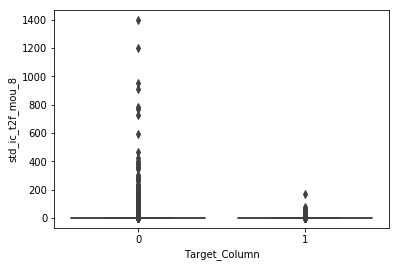

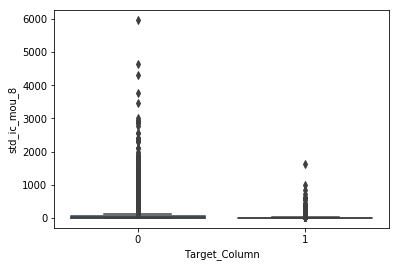

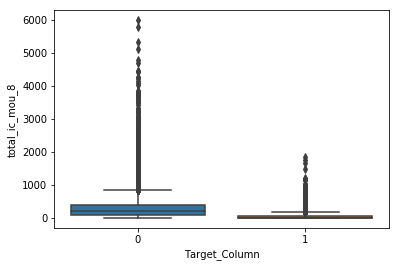

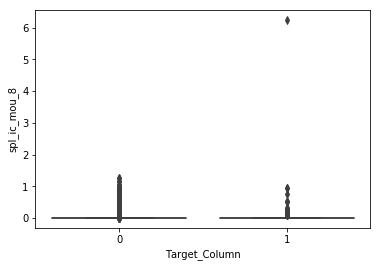

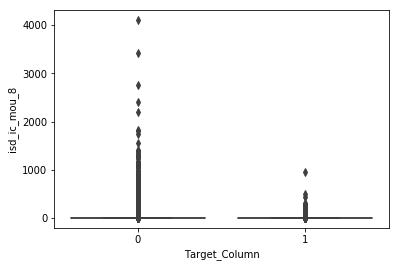

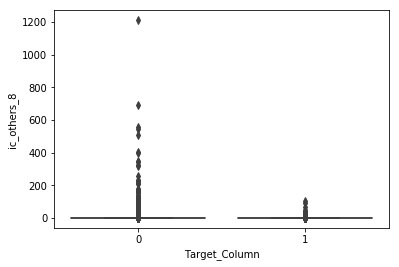

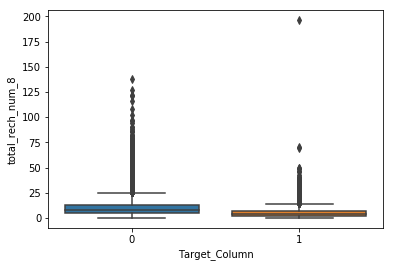

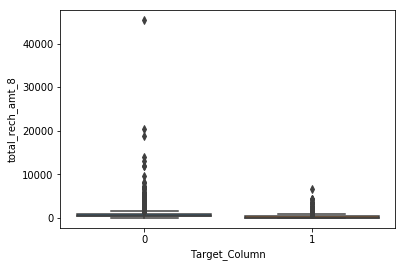

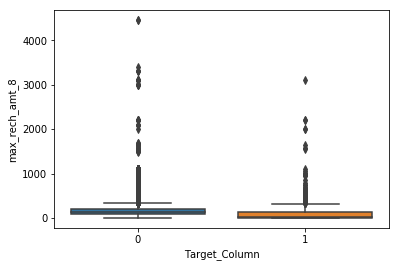

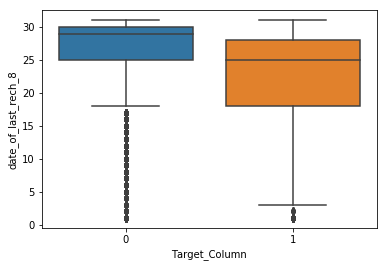

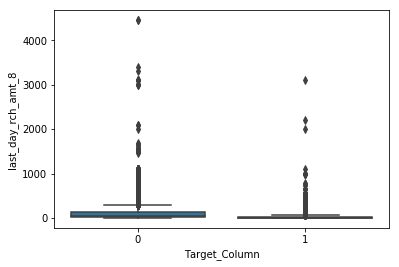

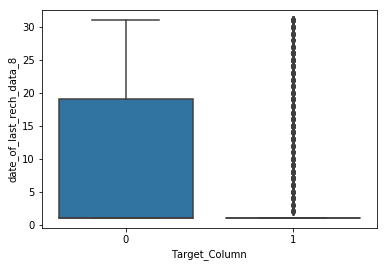

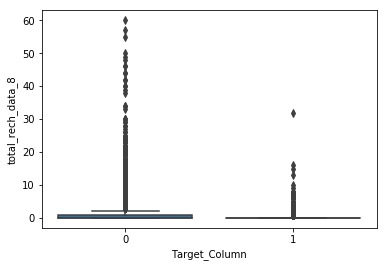

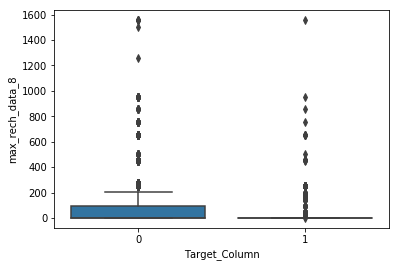

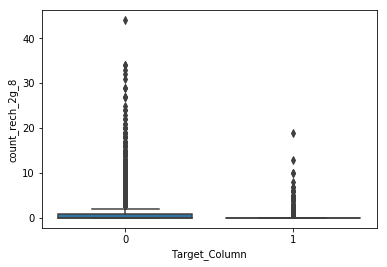

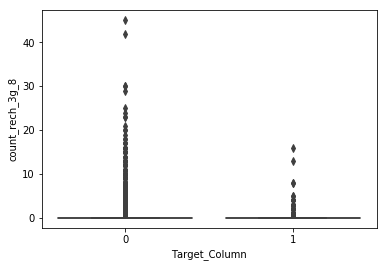

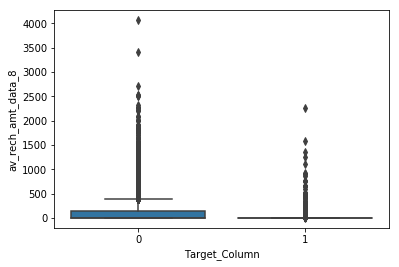

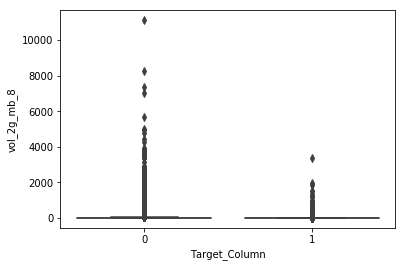

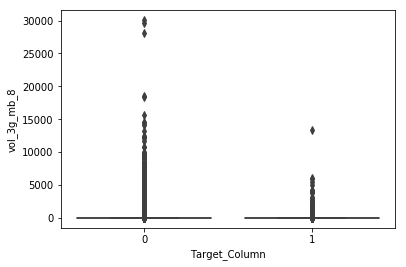

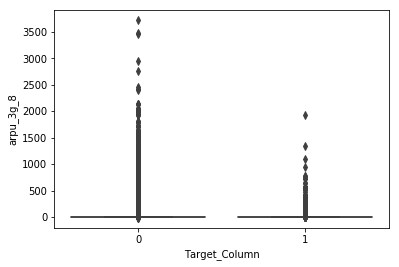

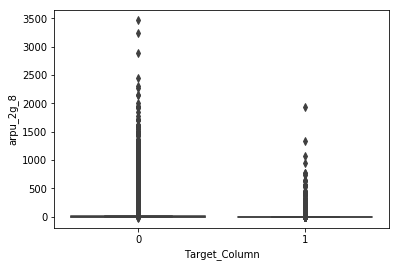

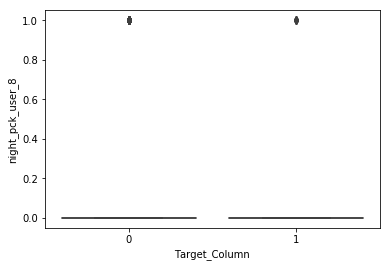

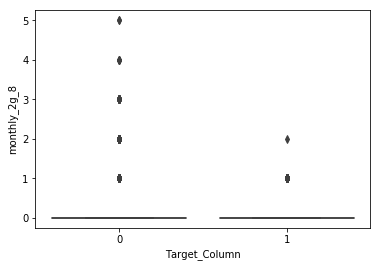

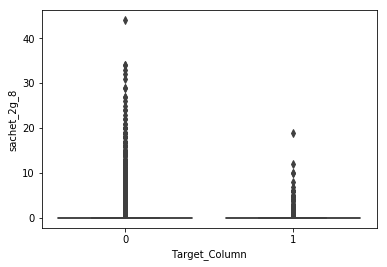

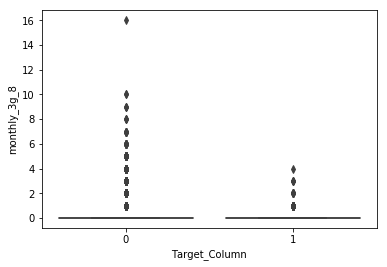

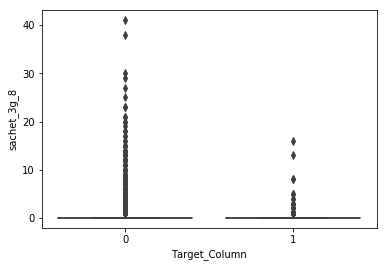

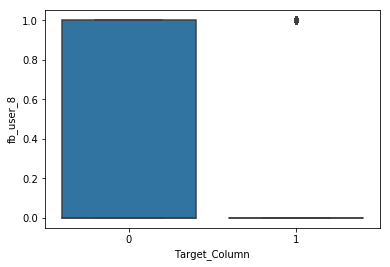

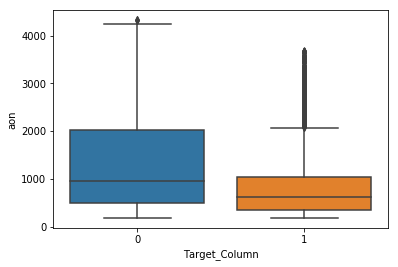

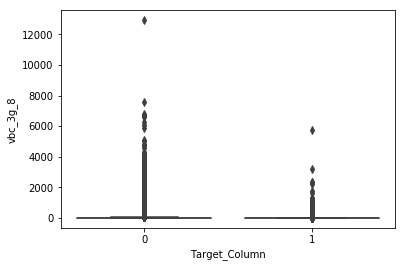

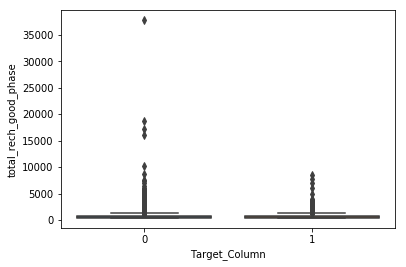

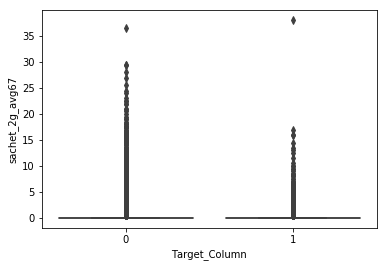

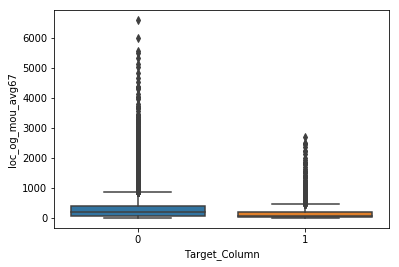

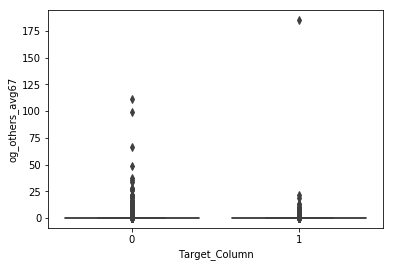

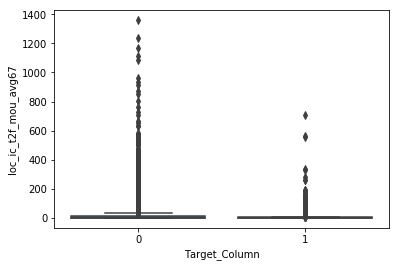

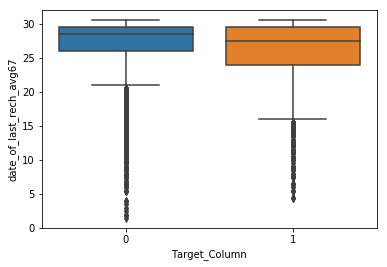

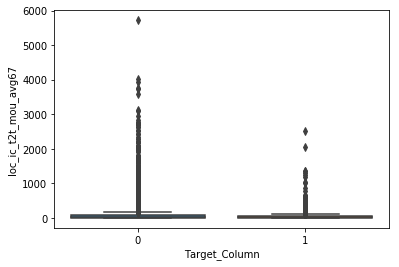

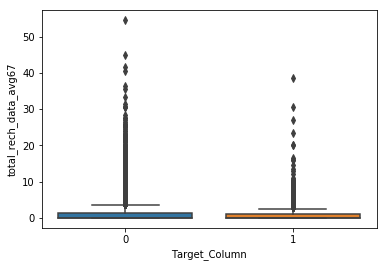

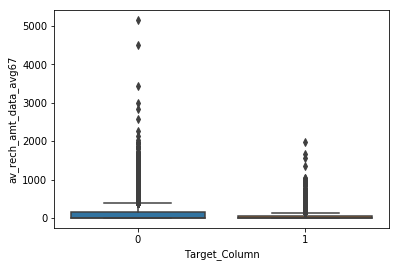

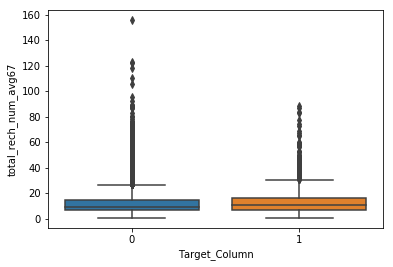

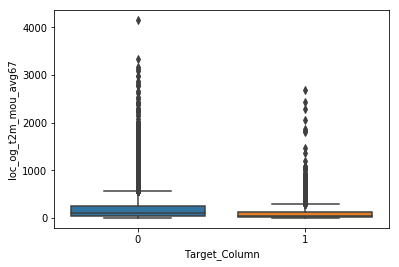

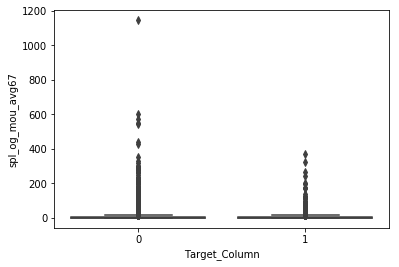

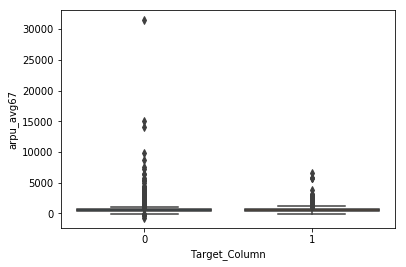

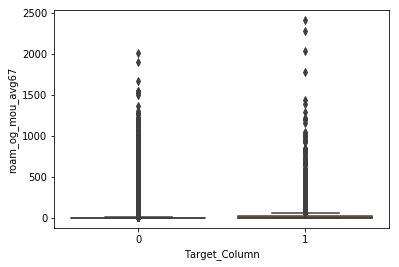

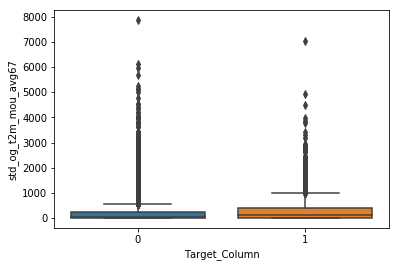

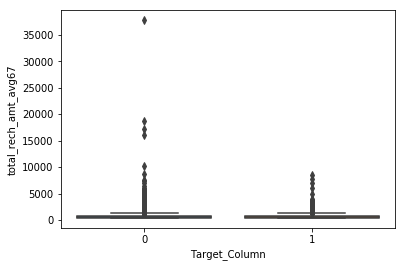

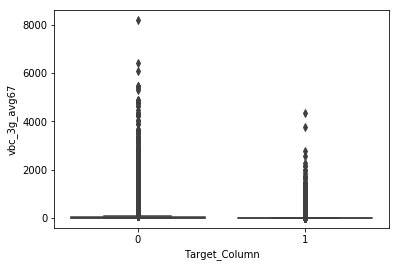

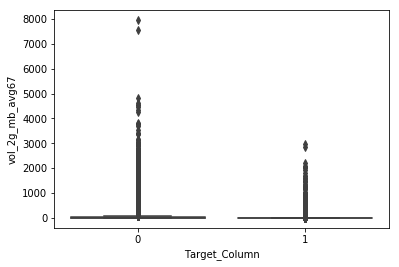

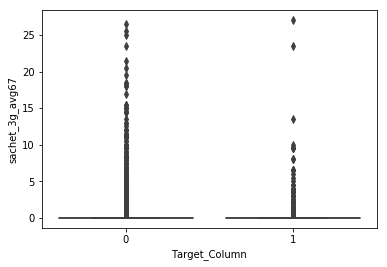

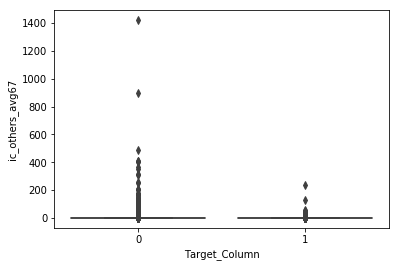

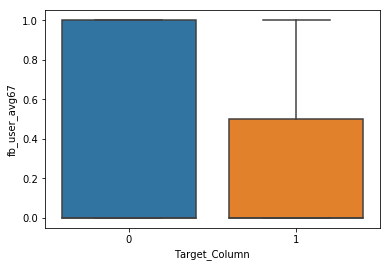

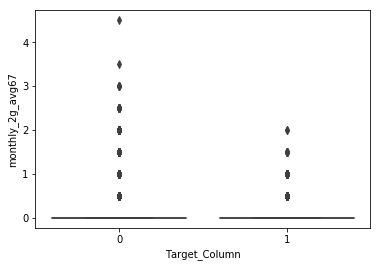

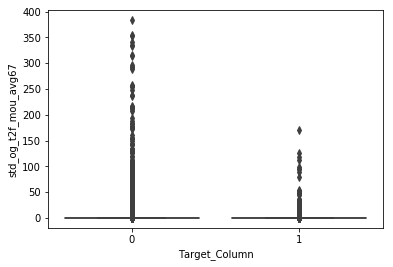

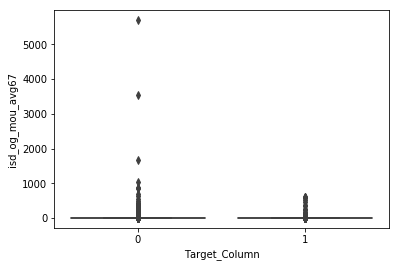

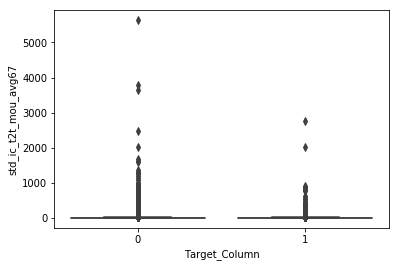

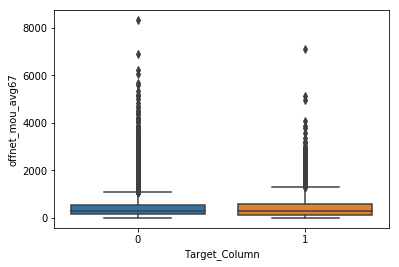

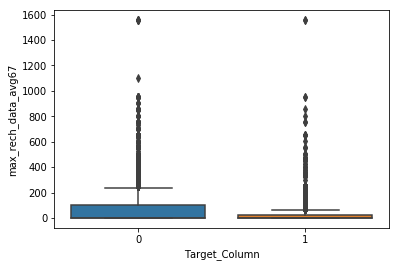

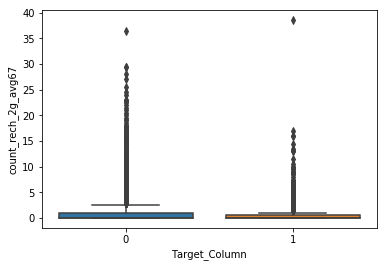

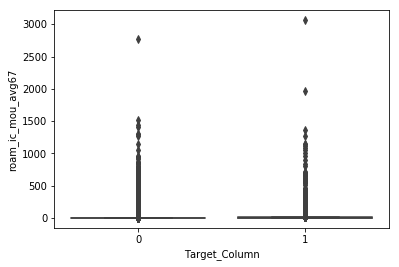

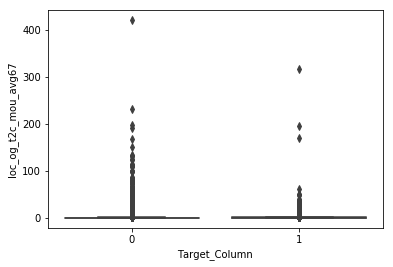

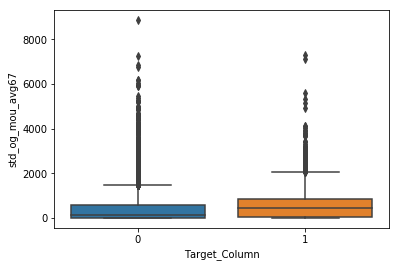

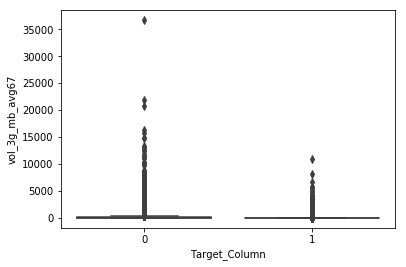

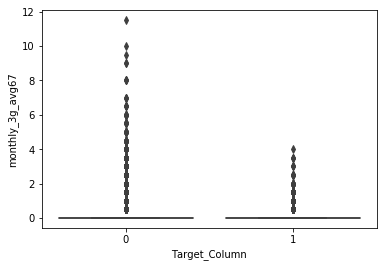

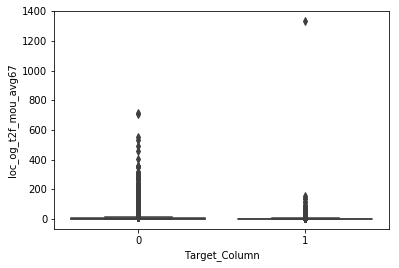

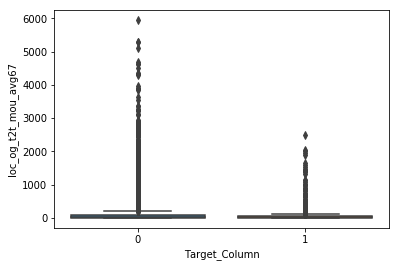

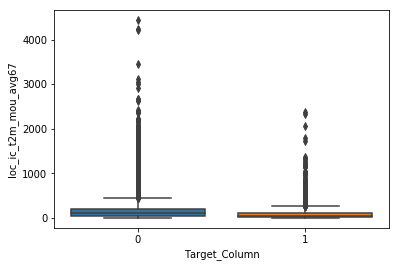

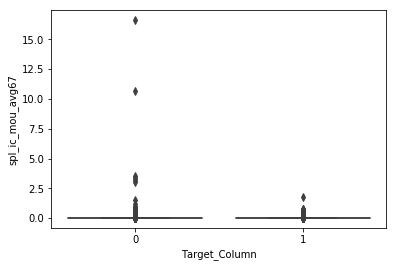

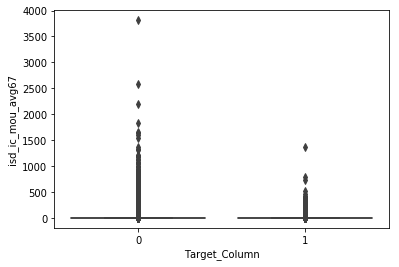

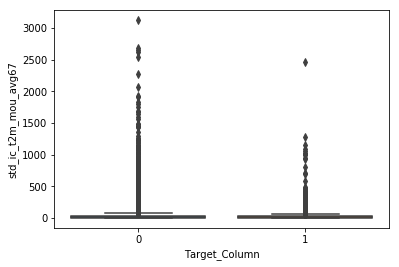

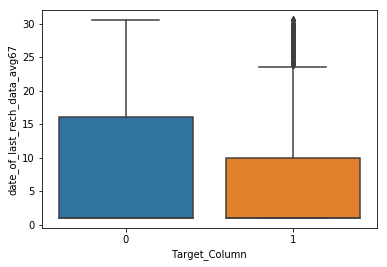

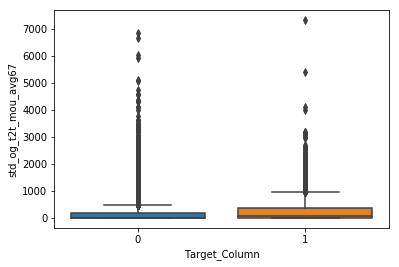

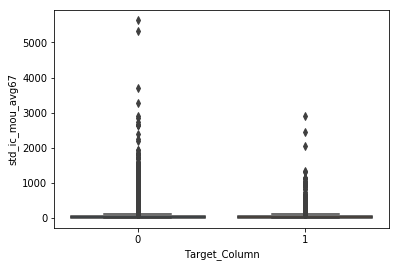

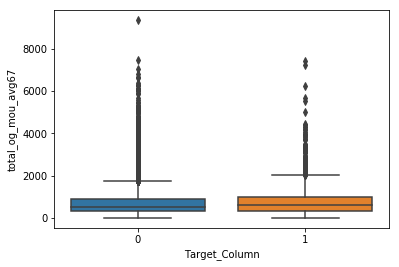

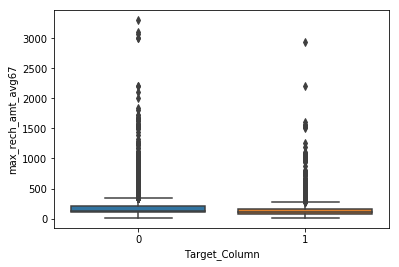

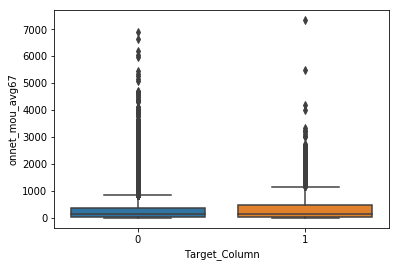

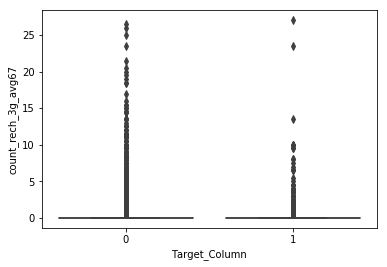

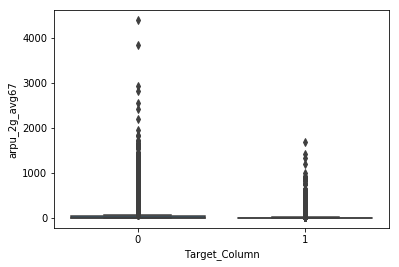

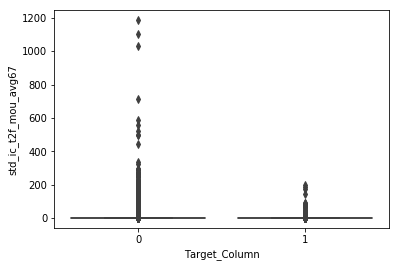

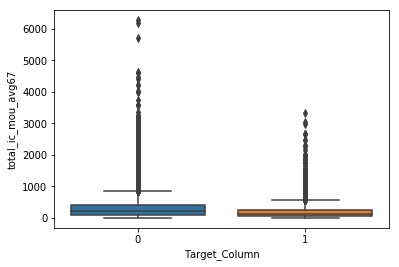

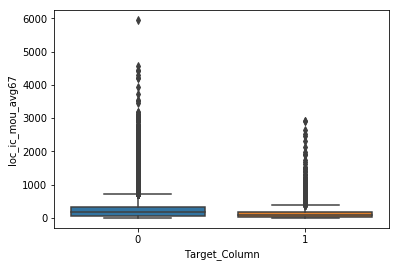

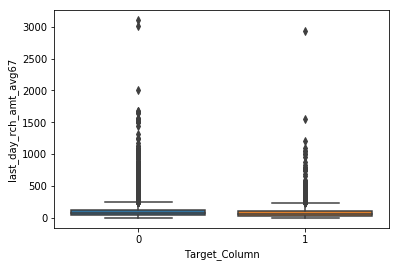

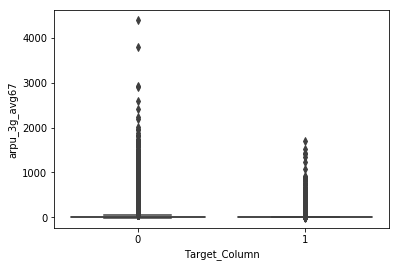

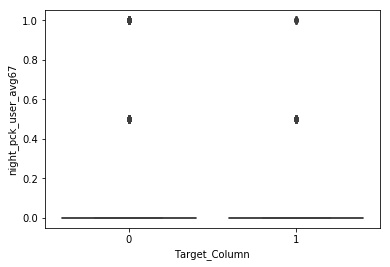

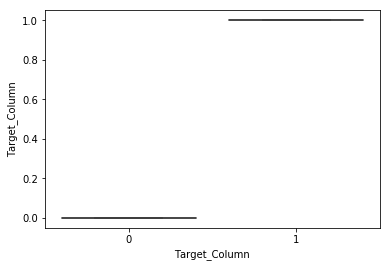

In [24]:
#Box plot for all columns
for col in telecom_df.columns:
    plt.figure()
    sns.boxplot(y=col, x='Target_Column', data=telecom_df, orient='v')
    plt.show()

In [25]:
#Function for removing outliers (top 0.005)
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.0)
    q3 = df_in[col_name].quantile(0.995)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [26]:
#Based on the box plot drawn above, manually selecting columns for removing outliers
col=['arpu_8','onnet_mou_8','offnet_mou_8','loc_og_t2t_mou_8','loc_og_t2m_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','spl_ic_mou_8','total_rech_amt_8','max_rech_amt_8','count_rech_2g_8','av_rech_amt_data_8','vol_2g_mb_8','vol_3g_mb_8','monthly_2g_8','monthly_3g_8','vbc_3g_8','total_rech_good_phase','onnet_mou_avg67','loc_og_mou_avg67','std_og_t2t_mou_avg67','vol_2g_mb_avg67','arpu_3g_avg67','last_day_rch_amt_avg67','count_rech_3g_avg67','loc_ic_t2m_mou_avg67','vol_3g_mb_avg67','std_ic_t2m_mou_avg67','loc_og_t2t_mou_avg67','total_rech_num_avg67','vbc_3g_avg67','max_rech_data_avg67','spl_ic_mou_avg67','offnet_mou_avg67','std_og_t2m_mou_avg67']
telecom_df.shape

(29979, 107)

In [27]:
#Removing outliers on columns listed in col - outlier analysis
for i in col:
    telecom_df=remove_outlier(telecom_df,i)
print("After removing outliers, new shape of dataframe is: ",telecom_df.shape)
print("Total rows lost :",29979-telecom_df.shape[0])

After removing outliers, new shape of dataframe is:  (29771, 107)
Total rows lost : 208


In [28]:
#Percentage of curners in dataset
print("Curners percentage in dataset",(telecom_df.loc[telecom_df['Target_Column']==1]).shape[0]*100/telecom_df.shape[0])

Curners percentage in dataset 8.649356756575191


In [29]:
#Highly imbalance data is present in dataframe, need to balance train data using Smote after splitting

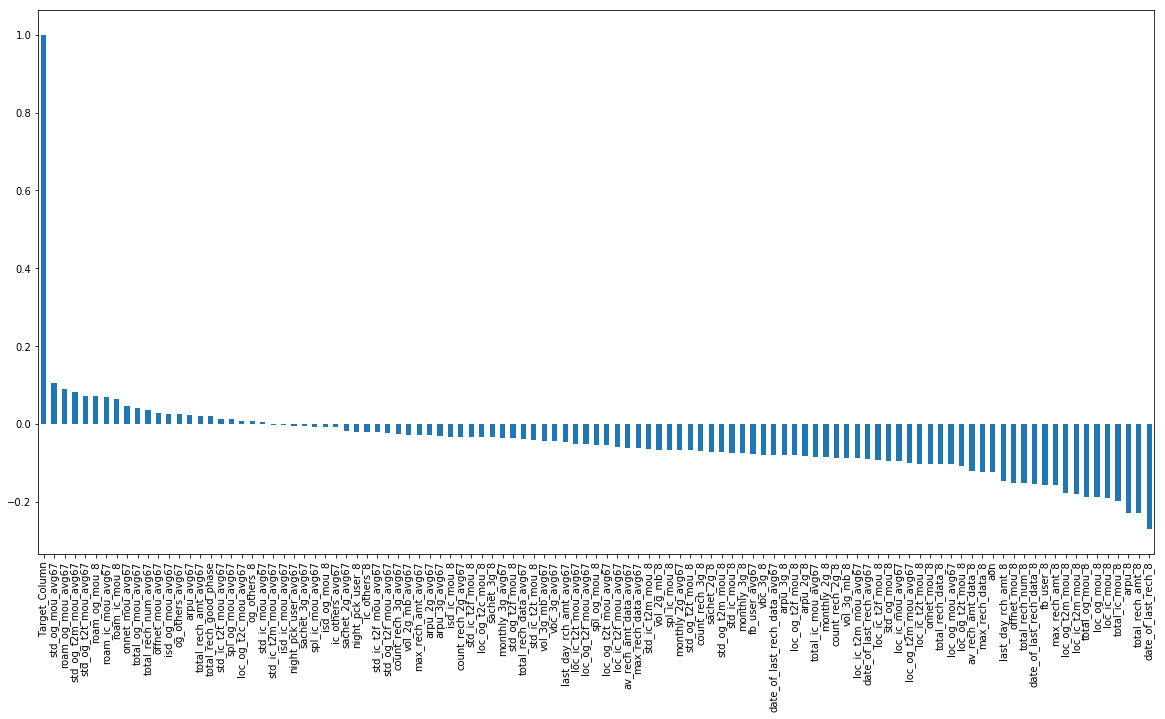

In [30]:
#Printing correlation of columns with target variable
plt.figure(figsize=(20,10))
telecom_df.corr()['Target_Column'].sort_values(ascending = False).plot(kind='bar')
plt.show()

In [31]:
#Above plot shows that date_of_last_rech_8, total_rech_amout_8, arpu_8, total_ic_mou_8, std_og_mou_avg67 are some columns that are highy correlated with Target Variable/ Churn Rate.

### Train Test Split

In [32]:
#Dividing target column and dependent column seperately into y and X repectively
X = telecom_df.drop(['Target_Column'], axis=1)
y = telecom_df['Target_Column']

In [33]:
#Splitting train ans test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [34]:
#Balancing train dataset using SMOTE such that churn percentage will become 50% in train data
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority',random_state=10)
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(38084, 106)
(38084,)


In [35]:
#Feature Standard Scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
X_scaled_train_df = preprocessing.StandardScaler().fit_transform(X_tr)
X_scaled_train_df

array([[ 0.55912529, -0.32474105,  1.6651958 , ..., -0.05778798,
        -0.34978489, -0.11581453],
       [-0.83163637, -0.40573249, -0.6584707 , ...,  0.55072856,
        -0.34978489, -0.11581453],
       [-0.57221497, -0.38397475, -0.49665923, ...,  0.9996342 ,
        -0.34978489, -0.11581453],
       ...,
       [-0.80904551, -0.35405543, -0.57595119, ...,  0.25145813,
        -0.34978489, -0.11581453],
       [-0.98637569, -0.5007387 , -0.6584707 , ..., -0.86510008,
        -0.2887962 , -0.11581453],
       [-0.98911154, -0.5007387 , -0.6584707 , ...,  0.01133187,
        -0.31353154, -0.11581453]])

### PCA - Dimensionality Reduction

In [36]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=100,svd_solver='randomized')

In [37]:
#Dimensionality reduction for scaled train dataset and printing cumsum of variance to get an idea of no of components to be used further
X_train_pca=pca.fit(X_scaled_train_df)
print(X_train_pca)
print(pca.explained_variance_ratio_.cumsum())

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='randomized', tol=0.0, whiten=False)
[0.14165633 0.23370128 0.3015996  0.35854924 0.39521993 0.43009587
 0.46200631 0.49031852 0.5165007  0.53983225 0.56095696 0.58141294
 0.60095908 0.61973739 0.63786576 0.65428168 0.66984494 0.68507062
 0.69911724 0.71219254 0.72440717 0.73595478 0.74745564 0.75850506
 0.76949532 0.78019805 0.79040553 0.80013659 0.80969382 0.81874151
 0.82687086 0.83487263 0.84266774 0.85023138 0.85749047 0.86454419
 0.87129141 0.87797634 0.88453296 0.8909337  0.89699018 0.90294892
 0.90860169 0.91406462 0.91910832 0.92405588 0.92869965 0.93326296
 0.93732    0.94100818 0.94455327 0.9479855  0.95132636 0.95451746
 0.95766883 0.96060485 0.96336627 0.96593465 0.96846884 0.97094018
 0.97328771 0.97558788 0.97777774 0.97991099 0.98194465 0.98387899
 0.9857301  0.98755101 0.98926996 0.99082277 0.9923117  0.99349967
 0.9944742  0.99536298 0.99619503 0.99698155 0.99765755 0.99821753
 0

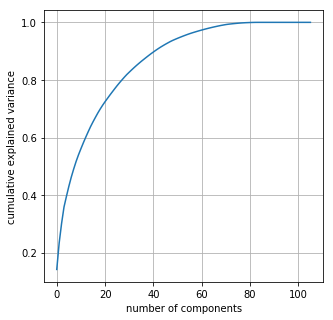

In [38]:
#Plot for drawing no of components vs cumulative explained variance
plt.figure(figsize=(5,5))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(True)
plt.show()

In [39]:
#From above graph we can see that 50 components nearly explains 94.1% of variance in total, therefore setting n_components as 50 in incremental pca
from sklearn.decomposition import IncrementalPCA
inc_pca = IncrementalPCA(n_components=50)

In [40]:
#Fitting scaled train dataset into incremental pca
X_pca_train_final = pd.DataFrame(inc_pca.fit_transform(X_scaled_train_df))
#Creating correlation matrix for the principal components
corrmat = np.corrcoef(X_pca_train_final.transpose())

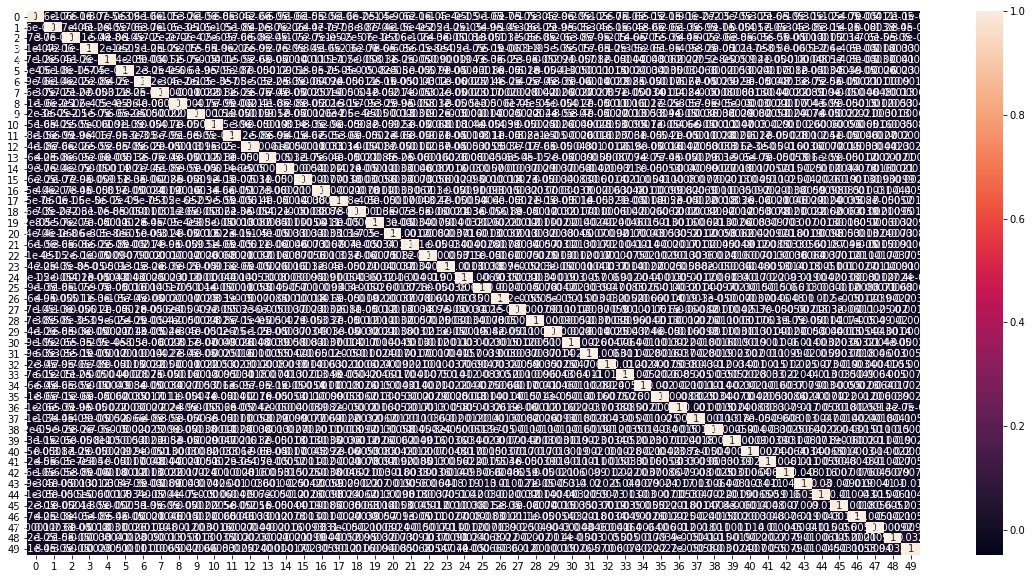

In [41]:
#plotting the correlation matrix
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot=True)
plt.show()

In [42]:
#Whole above plot is black which shows that no correaltion is present correlation matrix

In [43]:
#Printing minimum and maximum correaltion in matrix
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min())

max corr: 0.031534452452354735 , min corr:  -0.0484009717460416


In [44]:
#Applying selected components to the test data after scaling it - 50 components
X_scaled_test_df = preprocessing.StandardScaler().fit_transform(X_test)
X_pca_test_final = inc_pca.transform(X_scaled_test_df)
X_pca_test_final.shape

(8932, 50)

### Logistic Regression on PCA dataset

In [45]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(X_pca_train_final,y_tr)

In [46]:
#Making prediction on the test data and priting roc_auc score
pred_probs_test = model_pca.predict_proba(X_pca_test_final)[:,1]
print("roc_auc_score : {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

y_pred = model_pca.predict(X_pca_test_final)
y_pred = pd.DataFrame(y_pred)

roc_auc_score : 0.89


In [47]:
#Printing Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred)

array([[4770, 3384],
       [  50,  728]], dtype=int64)

In [48]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred))

Logistic Regression accuracy with PCA:  0.6155396327810121


In [49]:
#Printing Recall of model obtained
from sklearn.metrics import recall_score

print("Logistic Regression recall score: ",recall_score(y_test, y_pred))

Logistic Regression recall score:  0.9357326478149101


## Applying XGBOOST algorithm on dataset to create another model

In [50]:
# Importing libraries and fitting model on training data with default hyperparameters
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [51]:
#Prdecting test probabilities of both 0 and 1
y_pred_prob = model.predict_proba(X_test)
y_pred_prob

array([[0.78467774, 0.21532224],
       [0.99191594, 0.00808406],
       [0.9899519 , 0.0100481 ],
       ...,
       [0.9935849 , 0.00641513],
       [0.97994816, 0.02005184],
       [0.9955876 , 0.00441244]], dtype=float32)

In [52]:
# Evaluating predictions using ROC_AUC_Score 
roc = metrics.roc_auc_score(y_test, y_pred_prob[:,1])
print("ROC_AUC_Score: %.2f%%" % (roc * 100.0))

ROC_AUC_Score: 94.73%


In [53]:
#Prediction on test set and printing classification report for the same
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8154
           1       0.74      0.55      0.63       778

    accuracy                           0.94      8932
   macro avg       0.85      0.76      0.80      8932
weighted avg       0.94      0.94      0.94      8932



In [54]:
#Confusion matrix, accuarcy and recall for XGBoost
print(confusion_matrix(y_test,y_pred))
print("Accuracy of ",accuracy_score(y_test,y_pred))
print(recall_score(y_test, y_pred))

[[8001  153]
 [ 352  426]]
Accuracy of  0.94346171070309
0.5475578406169666


In [55]:
#HyperParameter Tuning
from sklearn.model_selection import GridSearchCV
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1, 0.3], 
             'subsample': [0.6, 0.9],}

# specify model
xgb_model = XGBClassifier(max_depth= 5, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,n_jobs=-1,
                        return_train_score=True) 

In [56]:
model_cv.fit(X_train, y_train)  

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:  1.5min remaining:   17.6s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3], 'subsample': [0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             s

In [57]:
model_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [58]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.1,
          'max_depth': 5, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [59]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob[:10]

array([[0.78467774, 0.21532224],
       [0.99191594, 0.00808406],
       [0.9899519 , 0.0100481 ],
       [0.99566585, 0.00433414],
       [0.99369085, 0.00630913],
       [0.9747077 , 0.02529229],
       [0.9863636 , 0.01363639],
       [0.8739711 , 0.12602891],
       [0.99467087, 0.00532911],
       [0.9911873 , 0.00881271]], dtype=float32)

In [60]:
#Calculating AUC score of tuned XGBoost
import sklearn
from sklearn import metrics
auc = sklearn.metrics.roc_auc_score(y_test, y_pred_prob[:, 1])
auc

0.9472900521011657

In [61]:
#Prediction on test set and printing classification report for the same
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
#Confusion matrix, accuarcy and recall for XGBoost after hyperparameter tuning
print(confusion_matrix(y_test,y_pred))
print("Accuracy of XGBoost after hyperparameter tuning : ",accuracy_score(y_test,y_pred))
print("Recall Score : ",recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8154
           1       0.74      0.55      0.63       778

    accuracy                           0.94      8932
   macro avg       0.85      0.76      0.80      8932
weighted avg       0.94      0.94      0.94      8932

[[8001  153]
 [ 352  426]]
Accuracy of XGBoost after hyperparameter tuning :  0.94346171070309
Recall Score :  0.5475578406169666


In [62]:
# Feature importance selection using XGBoost
importance = dict(zip(X_train.columns, model.feature_importances_))
import pandas as pd
feature_importances_afterHPTuning= pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances_afterHPTuning.head(10)

,importance
total_ic_mou_8,0.182234
loc_ic_mou_8,0.054572
loc_ic_t2m_mou_8,0.044600
fb_user_8,0.044208
total_rech_data_8,0.035454
last_day_rch_amt_8,0.028240
loc_og_mou_8,0.024174
max_rech_data_8,0.022343
roam_og_mou_8,0.022338
loc_og_t2m_mou_8,0.021438


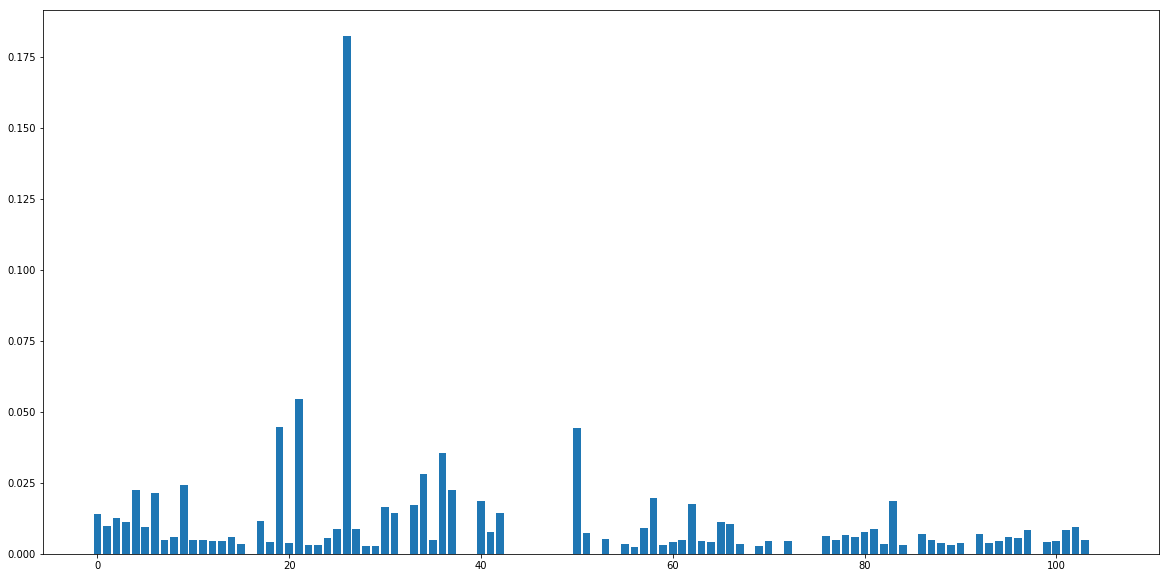

In [63]:
# Plot of the feature importance vs columns
plt.figure(figsize = (20,10))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [64]:
#Therefore from above graph and feature importance outcome we can get most important features. Below are the most important 
#columns that involves in prediction of churn
# total_ic_mou_8
# roam_og_mou_8
# date_of_last_rech_8
# last_day_rch_amt_8
# total_og_mou_8
# roam_ic_mou_8
# total_rech_num_avg67
# loc_og_mou_8
# max_rech_data_avg67

## Decision Tree Model Making

In [65]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_tr, y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = model.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      8154
           1       0.42      0.77      0.54       778

    accuracy                           0.89      8932
   macro avg       0.70      0.83      0.74      8932
weighted avg       0.93      0.89      0.90      8932



In [67]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print("Accuracy Score using Decision tree model: ", accuracy_score(y_test,y_pred_default))

[[7338  816]
 [ 182  596]]
Accuracy Score using Decision tree model:  0.8882669055082848


In [68]:
print("Recall Score: ",recall_score(y_test, y_pred_default))

Recall Score:  0.7660668380462725


In [69]:
# Hyperparameter Tuning for Decision trees
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = 5, verbose = 1, n_jobs=-1)

# Fit the grid search to the train data
grid_search.fit(X_tr,y_tr)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   38.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                        

In [70]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9136382732906208
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [71]:
# model with optimal hyperparameters
clf_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 1,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_entropy.fit(X_tr, y_tr)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [72]:
# accuracy score
clf_entropy.score(X_test,y_test)

0.9006941334527542

In [73]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_entropy.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8154
           1       0.46      0.75      0.57       778

    accuracy                           0.90      8932
   macro avg       0.72      0.83      0.76      8932
weighted avg       0.93      0.90      0.91      8932



In [74]:
print(confusion_matrix(y_test,y_pred))

[[7459  695]
 [ 192  586]]


In [75]:
print(accuracy_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test, y_pred))

0.9006941334527542
Recall Score:  0.7532133676092545


## Random Forest Model Making

In [76]:
#Importing libraries for random forest classifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [77]:
#Instantiate random forest classifier object
rfc = RandomForestClassifier()

In [78]:
#Fitting train dataset
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
#Prediction on test dataset
y_pred_default = rfc.predict(X_test)

In [80]:
#Classification report
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8154
           1       0.76      0.45      0.56       778

    accuracy                           0.94      8932
   macro avg       0.86      0.72      0.77      8932
weighted avg       0.93      0.94      0.93      8932



In [81]:
#Confusion matrix
print(confusion_matrix(y_test,y_pred_default))

[[8047  107]
 [ 431  347]]


In [82]:
#Accuracy and recall for random forest data presdiction (default)
print(accuracy_score(y_test,y_pred_default))
print("Recall Score: ",recall_score(y_test, y_pred_default))

0.9397671294223018
Recall Score:  0.44601542416452444


In [83]:
#Hyperparameter Tuning

#Tuning max depth
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rfc = RandomForestClassifier()


# fit tree on training data
rfc = GridSearchCV(rfc, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [84]:
# scores of GridSearch CV
scores = rfc.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.182898,0.002608,0.009395,0.000496,2,{'max_depth': 2},0.938355,0.939074,0.934965,0.938085,0.937845,0.937665,0.001411,4,0.938332,0.937972,0.938220,0.939179,0.937560,0.938253,0.000534
1,0.514700,0.005617,0.011394,0.000490,7,{'max_depth': 7},0.940753,0.938834,0.937125,0.940245,0.942405,0.939872,0.001786,2,0.945771,0.946071,0.946977,0.945417,0.945777,0.946003,0.000529
2,0.821928,0.010594,0.013393,0.000489,12,{'max_depth': 12},0.940993,0.940513,0.939045,0.939045,0.943365,0.940592,0.001590,1,0.971086,0.975105,0.973369,0.973728,0.973009,0.973259,0.001298
3,0.969017,0.008026,0.014194,0.000398,17,{'max_depth': 17},0.938115,0.940753,0.934245,0.938085,0.937845,0.937809,0.002076,3,0.990042,0.990222,0.991303,0.990343,0.991963,0.990774,0.000737


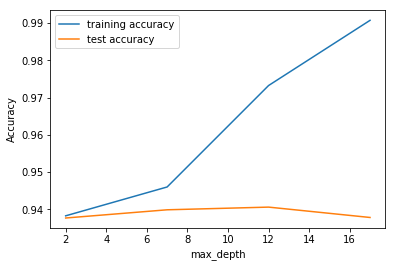

In [85]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [86]:
#Tuning n_estimators
n_folds = 5

parameters = {'n_estimators': range(100, 1500, 400)}

rfc = RandomForestClassifier(max_depth=7)


# fit tree on training data
rfc = GridSearchCV(rfc, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True,
                  n_jobs=-1)
rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=7,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [87]:
# Scores of GridSearch CV
scores = rfc.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.952860,0.102285,0.111136,0.003968,100,{'n_estimators': 100},0.940753,0.939314,0.939285,0.940245,0.943605,0.940640,0.001584,3,0.944991,0.944991,0.945897,0.944878,0.945417,0.945235,0.000379
1,39.568627,0.206697,0.489517,0.029657,500,{'n_estimators': 500},0.941713,0.939314,0.939285,0.940725,0.942885,0.940784,0.001392,1,0.945591,0.945711,0.946077,0.944338,0.944758,0.945295,0.000645
2,75.391159,0.791311,0.975837,0.118355,900,{'n_estimators': 900},0.940993,0.939554,0.939285,0.940485,0.943365,0.940736,0.001452,2,0.945591,0.944931,0.945897,0.944818,0.944938,0.945235,0.000429
3,94.686231,9.410660,0.782546,0.085908,1300,{'n_estimators': 1300},0.940273,0.939554,0.939525,0.940245,0.943125,0.940544,0.001330,4,0.945411,0.944811,0.945777,0.944458,0.945298,0.945151,0.000464


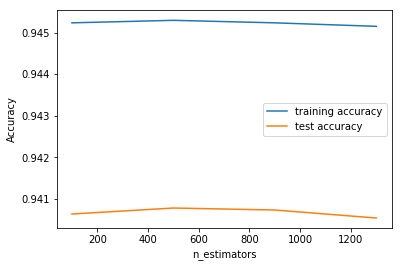

In [88]:
# Plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [89]:
#Tuning max_features
n_fold = 5
# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rfc = RandomForestClassifier(max_depth=7)


# fit tree on training data
rfc = GridSearchCV(rfc, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True,
                  n_jobs=-1)
rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=7,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [90]:
# scores of GridSearch CV
scores = rfc.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.428552,0.015642,0.022787,0.001325,4,{'max_features': 4},0.939554,0.938594,0.937605,0.940725,0.940725,0.939440,0.001216,5,0.943911,0.943191,0.944158,0.943138,0.943198,0.943519,0.000428
1,0.747967,0.018096,0.020989,0.002096,8,{'max_features': 8},0.941473,0.940034,0.938085,0.939045,0.943605,0.940448,0.001936,1,0.944571,0.944571,0.945118,0.945717,0.944578,0.944911,0.000455
2,1.197708,0.044519,0.017789,0.001166,14,{'max_features': 14},0.941233,0.939794,0.939525,0.939525,0.941685,0.940352,0.000920,3,0.947870,0.948110,0.949976,0.947877,0.947217,0.948210,0.000932
3,1.581086,0.021182,0.017790,0.001326,20,{'max_features': 20},0.941713,0.939794,0.939525,0.940725,0.940245,0.940400,0.000773,2,0.948530,0.948470,0.951296,0.948417,0.951416,0.949626,0.001413
4,1.673236,0.127658,0.013396,0.001850,24,{'max_features': 24},0.941473,0.938355,0.938325,0.941205,0.940725,0.940016,0.001390,4,0.949610,0.950390,0.951775,0.948117,0.951775,0.950333,0.001386


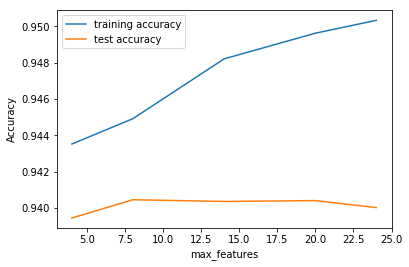

In [91]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [92]:
#Tuning min_samples_leaf
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rfc = RandomForestClassifier()


# fit tree on training data
rfc = GridSearchCV(rfc, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True,
                  n_jobs=-1)
rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [93]:
# scores of GridSearch CV
scores = rfc.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.034004,0.036380,0.026785,0.002226,100,{'min_samples_leaf': 100},0.939794,0.938115,0.936885,0.939285,0.940725,0.938961,0.001337,1,0.940612,0.939472,0.940439,0.940019,0.939179,0.939944,0.000548
1,0.955846,0.024633,0.027187,0.008488,150,{'min_samples_leaf': 150},0.937635,0.936915,0.935925,0.937365,0.939285,0.937425,0.001097,5,0.938452,0.939952,0.939239,0.939000,0.938100,0.938949,0.000642
2,0.892083,0.013343,0.023188,0.007904,200,{'min_samples_leaf': 200},0.939554,0.938355,0.935685,0.937605,0.938085,0.937857,0.001262,4,0.937852,0.940192,0.939239,0.939479,0.937740,0.938901,0.000955
3,0.851506,0.036002,0.019990,0.002897,250,{'min_samples_leaf': 250},0.937635,0.939554,0.934965,0.938085,0.941685,0.938385,0.002218,3,0.938392,0.939532,0.936480,0.938820,0.938760,0.938397,0.001027
4,0.799137,0.041901,0.019588,0.001959,300,{'min_samples_leaf': 300},0.938594,0.935716,0.936165,0.938325,0.936885,0.937137,0.001146,6,0.937732,0.937552,0.938940,0.937980,0.937020,0.937845,0.000632


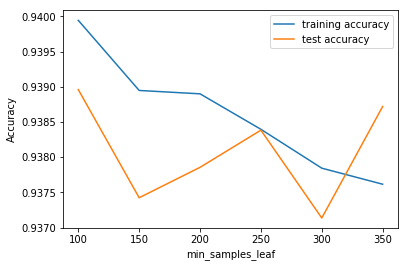

In [94]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [95]:
#Tuning min sample split
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rfc = RandomForestClassifier()


# fit tree on training data
rfc = GridSearchCV(rfc, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True,
                  n_jobs=-1)
rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [96]:
# scores of GridSearch CV
scores = rfc.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.746392,0.113844,0.028984,0.002827,200,{'min_samples_split': 200},0.939794,0.938594,0.938565,0.940485,0.942885,0.940064,0.001588,3,0.941332,0.941212,0.942298,0.942718,0.941099,0.941732,0.000652
1,1.696419,0.097397,0.028384,0.007858,250,{'min_samples_split': 250},0.940513,0.938834,0.936885,0.940005,0.942165,0.939680,0.001761,5,0.941332,0.941512,0.941879,0.941099,0.941219,0.941408,0.000272
2,1.592280,0.117740,0.021787,0.000747,300,{'min_samples_split': 300},0.940753,0.939314,0.939045,0.940005,0.942165,0.940256,0.001123,2,0.941032,0.940852,0.940679,0.939779,0.940619,0.940592,0.000431
3,1.539511,0.089661,0.021987,0.001095,350,{'min_samples_split': 350},0.940753,0.939314,0.939765,0.938805,0.942885,0.940304,0.001441,1,0.940552,0.941272,0.941159,0.939359,0.940559,0.940580,0.000679
4,1.468751,0.059311,0.020189,0.002784,400,{'min_samples_split': 400},0.939794,0.938834,0.937125,0.940485,0.942645,0.939776,0.001824,4,0.941032,0.939412,0.941219,0.941639,0.940199,0.940700,0.000796


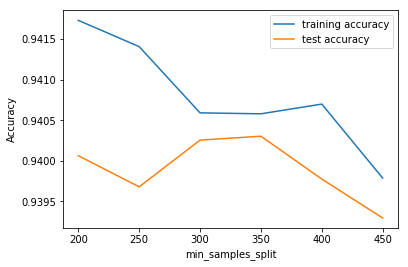

In [97]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [106]:
#Instantiating random forest classifier object with best parameters obtained above and then fitting training dataset
model_rfc = RandomForestClassifier(bootstrap=True,
                                  max_depth=7,
                                  min_samples_leaf=100, 
                                  min_samples_split=350,
                                  n_estimators=500,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  class_weight='balanced',
                                  max_features=8)

model_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=7, max_features=8,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=350, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=50, verbose=0, warm_start=False)

In [107]:
#Prediction on test dataset
y_pred = model_rfc.predict(X_test)

In [108]:
#Classification report and confusion matrix for the model achieved
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8154
           1       0.44      0.78      0.57       778

    accuracy                           0.90      8932
   macro avg       0.71      0.84      0.75      8932
weighted avg       0.93      0.90      0.91      8932

[[7386  768]
 [ 169  609]]


In [109]:
print("Accuracy of Random forest:",accuracy_score(y_test,y_pred))
print("Recall Score for model obtained from Random Forest: ",recall_score(y_test, y_pred))

Accuracy of Random forest: 0.8950962830273175
Recall Score for model obtained from Random Forest:  0.7827763496143959


## Final Report:
- Prediction using Logistic Regression with PCA gives accuracy - 61.5% and recall - 93.5%
- Prediction using XGBoost with hyperparameter tuning gives accuracy - 94% and recall - 54%
- Prediction using Decision trees with hyperparameter tuning gives accuaracy - 90% and recall - 75%
- Prediction using Random forest with hyperparameter tuning gives accuracy - 89.5% and recall - 78%
- From above 4 points we can say that Random forest works best for identifying churners with approx 90% accuracy and recall score as 78%. For Logistic Regression with PCA gives us very good recall score of 93.5% but with low accuracy of 61% thus not suited for final selection of models. Reverse is in the case of XGBoost, accuracy is high but recall is low. Decision trees are nearly same with Random Forest in terms of accuracy but having low recall score than Random forest.

#### Important predictor attributes which help the business understand indicators of churn are:
- total_ic_mou_8
- roam_og_mou_8
- date_of_last_rech_8
- last_day_rch_amt_8
- total_og_mou_8
- roam_ic_mou_8
- total_rech_num_avg67
- loc_og_mou_8
- max_rech_data_avg67
    
#### Recommondations:
- Offer discounted roaming outgoing packs
- Offer additional talk time with additional validity on the recharges
- Give more discount to the customers who have been with the network for more than an year or less than 3 months 